In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/dataset.csv', index_col=0)
df.drop_duplicates(subset=['track_name'], inplace=True)

# Descrição das colunas
- track_id: O ID do Spotify para os artistas da faixa: Os nomes dos artistas que apresentaram a faixa. Se houver mais de um artista, eles são separados por a;
- album_name: O nome do álbum no qual a faixa aparece
- track_name: Nome da faixa
- popularity: A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de reproduções que a faixa teve e quão recentes são essas reproduções. De um modo geral, as músicas que estão sendo muito tocadas agora terão uma popularidade maior do que as músicas que eram muito tocadas no passado. Faixas duplicadas (por exemplo, a mesma faixa de um single e um álbum) são classificadas de forma independente. A popularidade do artista e do álbum é derivada matematicamente da popularidade da faixa.
- duration_ms: A duração da trilha em milissegundos
- explicit: Se a faixa tem ou não letras explícitas (verdadeiro = sim, tem; falso = não, não tem OU desconhecido)
- danceability: Danceability descreve o quanto uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é o mais dançável
- energy: A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala
- key: O tom em que a faixa está. Os inteiros são mapeados para as notas usando a notação padrão de Classe de Pitch. Por exemplo. 0 = C, 1 = C♯/D♭, 2 = D e assim por diante. Se nenhuma chave foi detectada, o valor é -1
- loudness: o volume geral de uma faixa em decibéis (dB)
- mode: Mode indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual deriva seu conteúdo melódico. Maior é representado por 1 e menor é 0
- Speechiness: Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, livro de áudio, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala
- acousticness: Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica
- instrumentalidade: prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter nenhum conteúdo vocal
- liveness: Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa
- valence: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado)
- tempo: O andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida
- time_signature: Uma fórmula de compasso estimada. A fórmula de compasso (medidor) é uma convenção de notação para especificar quantas batidas há em cada compasso (ou compasso). A fórmula de compasso varia de 3 a 7, indicando fórmulas de compasso de 3/4 a 7/4.
- track_genre: O gênero ao qual a faixa pertence

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73609 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73609 non-null  object 
 1   artists           73608 non-null  object 
 2   album_name        73608 non-null  object 
 3   track_name        73608 non-null  object 
 4   popularity        73609 non-null  int64  
 5   duration_ms       73609 non-null  int64  
 6   explicit          73609 non-null  bool   
 7   danceability      73609 non-null  float64
 8   energy            73609 non-null  float64
 9   key               73609 non-null  int64  
 10  loudness          73609 non-null  float64
 11  mode              73609 non-null  int64  
 12  speechiness       73609 non-null  float64
 13  acousticness      73609 non-null  float64
 14  instrumentalness  73609 non-null  float64
 15  liveness          73609 non-null  float64
 16  valence           73609 non-null  float

# Número de Músicas por Gênero

In [ ]:
n_track_genre = df['track_genre'].value_counts()

In [ ]:
n_track_genre.iloc[:20]

black-metal      981
comedy           965
afrobeat         945
heavy-metal      944
cantopop         935
bluegrass        930
forro            925
anime            925
grindcore        924
malay            921
chicago-house    916
breakbeat        914
acoustic         911
brazil           908
study            902
ambient          896
disney           895
j-idol           893
sleep            891
happy            882
Name: track_genre, dtype: int64

## Popularidade x Gênero

In [ ]:
plot1 = df[['track_genre','popularity']].groupby('track_genre').mean().sort_values(by='popularity', ascending=True)

In [ ]:
plot1

,popularity
track_genre,
iranian,2.178114
romance,3.714640
detroit-techno,11.263647
chicago-house,12.046943
latin,12.800505
...,...
metal,55.206897
chill,55.297199
pop,57.072340


In [134]:
px.bar(plot1, title='Indice de Popularidade de cada gênero')

## Danceabilidade e Positividade x Gênero

In [74]:
plot2 = df[['track_genre','danceability', 'valence']].groupby('track_genre').mean().sort_values(by='danceability', ascending=True)

In [75]:
plot2

,danceability,valence
track_genre,,
sleep,0.167098,0.056117
grindcore,0.271917,0.215192
black-metal,0.295319,0.191029
iranian,0.299981,0.154726
opera,0.307059,0.213074
...,...,...
minimal-techno,0.732595,0.283700
reggaeton,0.744750,0.674839
latino,0.751997,0.627755


In [109]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(x = plot2.index, y = plot2['danceability'].values, name='danceability'),
    go.Bar(x = plot2.index, y = plot2['valence'].values, name='valence')
])

fig.show()

## Top 10 músicas mais populares (do momento)



In [ ]:
top10 = df.sort_values(by='popularity', ascending=False).head(10)

In [ ]:
top10[['artists','track_name','popularity', 'track_genre']]

,artists,track_name,popularity,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99,hip-hop
20008,David Guetta;Bebe Rexha,I'm Good (Blue),98,dance
67356,Manuel Turizo,La Bachata,98,latin
67359,Bad Bunny,Tití Me Preguntó,97,latin
67358,Bad Bunny;Chencho Corleone,Me Porto Bonito,97,latin
79000,OneRepublic,I Ain't Worried,96,piano
67559,Bad Bunny,Efecto,96,latin
67500,Bad Bunny;Bomba Estéreo,Ojitos Lindos,95,latin
67603,Bad Bunny,Moscow Mule,94,latin


## Correlações

In [79]:
corr = df.copy()

In [80]:
data = corr.corr(method='pearson')

In [81]:
data

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.054362,0.062886,0.087785,-0.007494,0.003007,0.089028,-0.002471,-0.064187,-0.021447,-0.180661,-0.028300,0.018689,-0.000364,0.037385
duration_ms,-0.054362,1.000000,-0.067582,-0.056327,0.058491,0.011940,0.006096,-0.035288,-0.063027,-0.105785,0.104316,0.005470,-0.136736,0.024281,0.021968
explicit,0.062886,-0.067582,1.000000,0.111936,0.102718,0.001605,0.107458,-0.027413,0.344949,-0.082641,-0.115917,0.046631,-0.001362,-0.007120,0.034886
danceability,0.087785,-0.056327,0.111936,1.000000,0.133712,0.032451,0.269122,-0.057214,0.107017,-0.165581,-0.199286,-0.134948,0.497954,-0.014418,0.206977
energy,-0.007494,0.058491,0.102718,0.133712,1.000000,0.044277,0.758661,-0.065947,0.140196,-0.727633,-0.181271,0.191375,0.254481,0.258777,0.181639
key,0.003007,0.011940,0.001605,0.032451,0.044277,1.000000,0.035502,-0.144661,0.014077,-0.042736,-0.002468,-0.002808,0.026159,0.007005,0.015767
loudness,0.089028,0.006096,0.107458,0.269122,0.758661,0.035502,1.000000,-0.032870,0.052872,-0.577700,-0.431638,0.078446,0.293306,0.233541,0.195737
mode,-0.002471,-0.035288,-0.027413,-0.057214,-0.065947,-0.144661,-0.032870,1.000000,-0.034655,0.081303,-0.051908,0.018907,0.023226,0.000885,-0.021216
speechiness,-0.064187,-0.063027,0.344949,0.107017,0.140196,0.014077,0.052872,-0.034655,1.000000,0.016965,-0.108548,0.235299,0.031303,-0.008499,-0.013637
acousticness,-0.021447,-0.105785,-0.082641,-0.165581,-0.727633,-0.042736,-0.577700,0.081303,0.016965,1.000000,0.086932,-0.011658,-0.102955,-0.223217,-0.172822


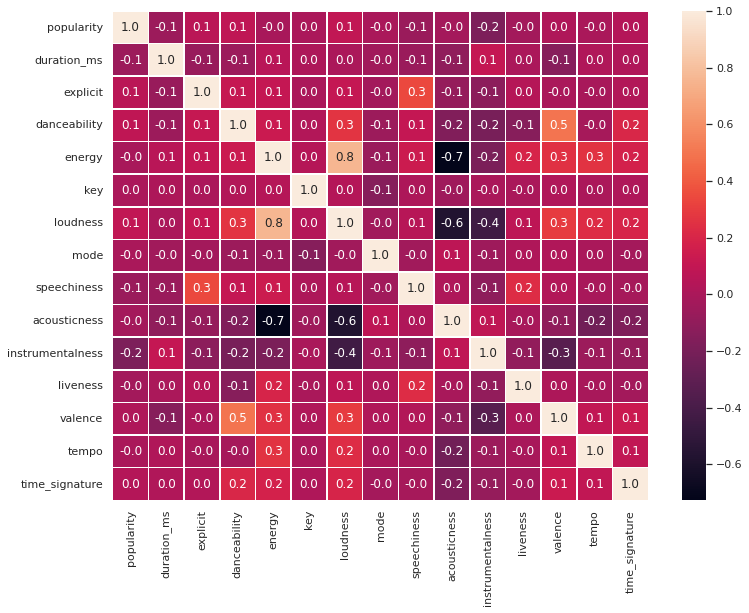

In [82]:
sns.set(rc={'figure.figsize':(12,9)})
plot = sns.heatmap(data, annot = True, fmt=".1f", linewidths=.6)
plot

## Gêneros com o popularidade mais estável?

In [ ]:
generos = df.groupby('track_genre')[['popularity']]

In [53]:
generos.describe()

popularity                                                    
                 count       mean        std  min    25%   50%   75%   max
track_genre                                                               
acoustic         911.0  43.245884  15.207536  0.0  30.00  47.0  54.0  82.0
afrobeat         945.0  24.590476  10.414427  0.0  18.00  21.0  29.0  75.0
alt-rock         777.0  38.803089  29.735364  0.0   0.00  46.0  66.0  93.0
alternative      224.0  35.870536  33.745636  0.0   0.00  42.0  68.0  86.0
ambient          896.0  44.928571  17.311521  0.0  40.00  50.0  55.0  84.0
...                ...        ...        ...  ...    ...   ...   ...   ...
techno           317.0  39.429022  13.910161  0.0  30.00  40.0  49.0  68.0
trance           574.0  38.108014  12.476666  0.0  29.25  38.0  47.0  70.0
trip-hop         733.0  33.963165  15.384685  0.0  19.00  35.0  49.0  64.0
turkish          796.0  40.845477   6.668993  0.0  39.00  40.0  43.0  77.0
world-music      762.0  41.398950  11.205682  1.0  36.00  43.0  49.0  66.0

[113 rows x 8 columns]

In [121]:
generos.mean().sort_values(by='popularity', ascending=False)

,popularity
track_genre,
pop-film,59.019634
k-pop,58.648649
pop,57.072340
chill,55.297199
metal,55.206897
...,...
latin,12.800505
chicago-house,12.046943
detroit-techno,11.263647


In [58]:
generos.std().sort_values(by='popularity', ascending=False)

,popularity
track_genre,
dance,38.313726
rock,36.167189
alternative,33.745636
electro,31.730033
soul,30.515051
...,...
samba,4.277922
forro,4.182642
iranian,4.162177


In [122]:
genre_gospel_dance = df.query("track_genre == 'gospel' or track_genre == 'dance'")

In [125]:
medias = genre_gospel_dance[['track_genre','popularity']].groupby('track_genre').mean().sort_values(by='popularity', ascending=True)

In [126]:
fig = go.Figure(data=[
    go.Scatter(x = genre_gospel_dance['track_genre'], y = genre_gospel_dance['popularity'].values, name='Valores', mode='markers'),
    go.Scatter(x = medias.index, y = medias['popularity'].values, name='Média', mode='markers')
])

fig.update_layout(
    autosize=False,
    width=500,
    height=800,
)

fig.show()

In [136]:
plot3 = df[['track_genre','popularity', 'speechiness']].groupby('track_genre').mean().sort_values(by='track_genre', ascending=True)
plot3

,popularity,speechiness
track_genre,,
acoustic,43.245884,0.043321
afrobeat,24.590476,0.086152
alt-rock,38.803089,0.054868
alternative,35.870536,0.094477
ambient,44.928571,0.041933
...,...,...
techno,39.429022,0.060735
trance,38.108014,0.077831
trip-hop,33.963165,0.078086


In [144]:
fig = go.Figure(data=[
    go.Line(x = plot3.index, y = plot3['popularity'].values, name='popularity'),
    go.Line(x = plot3.index, y = plot3['speechiness'].values*100, name='speechiness')
])

fig.show();